# North American Deer Image Classification

In this project, we will be creating an image classification model to correctly identify 3 similar that reside on the continent.

The three species are the following:
    
    - Columbian black-tail deer 
    - Mule deer
    - White-tailed deer 
    
These deer reside in the same region of the Western United States and Southwestern Canada which can make it difficult to differentiate between the three. This can be useful to a tourist in the many national parks in the West or novice hunters who need to properly identify the deer in order to match the deer species permit tag. We hope to solve that issue through this project.

The project will require the following steps:

- Get images from Google of each of the deer species.
- Pre-process the images and label the images in order to prepare the for machine learning models.
- Create models and evaluate the results.
- Fine tune the best models.
- Deploy the best model - (possible deployments could be an iOS/Android app, etc.)

### Extracting Images from the Web

- Here, we will use the simple_image_download library but we could also use different methods such as Beautiful Soup or Selenium. Due to the simple and user-friendly functions, I decided to choose SID library.

In [ ]:
#retrieve images from Google

deer_name=['blacktail deer olympic national park','mule deer photography', 'white tailed deer photography','whitetail deer']
more_deer=['mule deer herd','mule deer together','whitetail deer herd','whitetail deer doe','blacktail deer doe','mule deer doe']


from simple_image_download import simple_image_download as sid 
response = sid.simple_image_download

for i in deer_name:
    response().download(i, 70)
    
for i in more_deer:
    response().download(i, 20)


- It's important to look through Google before we download images, especially if we are downloading many images since the process of downloading and labeling can be time-consuming. After looking through various different searches, I noticed that these searches give me the best results and the more_deer list allows for pictures of deer at different angles, in a group, etc. There are some low quality pictures and different species showing up in these searches but we will manually review these images and remove them from the folders.


- We will also compile all the images into 3 separate folders, blacktail_deer, mule_deer, whitetail_deer.

In [ ]:
#let's rename all the image files in the 3 folders 

import glob
import os

path = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/blacktail_deer'
path_2 = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/mule_deer'
path_3 = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/whitetail_deer'

i = 0

for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'blacktail_'+str(i)+'.jpg'))
    i = i +1
    
i = 0

for filename in os.listdir(path_2):
    os.rename(os.path.join(path_2,filename), os.path.join(path_2,'mule_'+str(i)+'.jpg'))
    i = i +1
    
i = 0

for filename in os.listdir(path_3):
    os.rename(os.path.join(path_3,filename), os.path.join(path_3,'whitetail_'+str(i)+'.jpg'))
    i = i +1

### Image Processing

Image preprocessing is an important step since we need to decide whether we should transform the images, blur the images, resize them, etc. Making these decisions plays an important role in determining what the ML model will pick up and how effectively or how much memory we are using.

- Let's view some of the images we downloaded along with some information about them.


In [10]:
#import some packages

import cv2
import os,sys
from PIL import Image, ImageOps
import pandas as pd

from scipy.stats import stats
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#### Columbian black tail deer

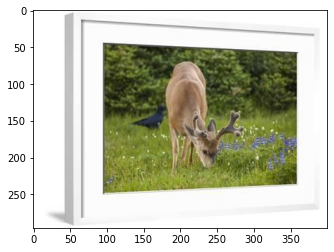

In [11]:
path = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/blacktail_deer/blacktail_1.jpg'

b_deer = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
plt.imshow(b_deer)
plt.show()

In [12]:
md = Image.open(path)

print(md.format,'-', md.size,'-', md.mode)

JPEG - (400, 296) - RGB


#### Mule deer

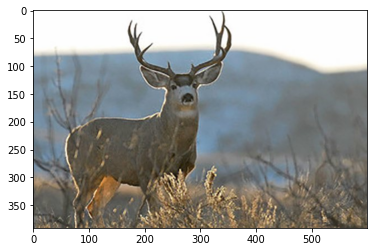

In [13]:
path = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/mule_deer/mule_1.jpg'

m_deer = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
plt.imshow(m_deer)
plt.show()

In [14]:
md = Image.open(path)

print(md.format,'-', md.size,'-', md.mode)

JPEG - (600, 391) - RGB


#### Whitetail deer 

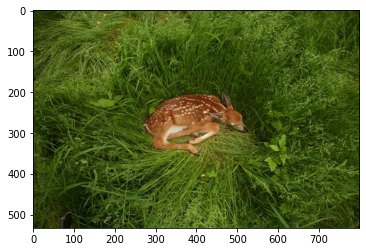

JPEG - (800, 533) - RGB


In [17]:
path = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/whitetail_deer/whitetail_1.jpg'

w_deer = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
plt.imshow(w_deer)
plt.show()

md = Image.open(path)

print(md.format,'-', md.size,'-', md.mode)

In [16]:
md = Image.open(path)

print(md.format,'-', md.size,'-', md.mode)

JPEG - (800, 533) - RGB


In [ ]:
### testing - IT WORKSSSSS!!!

In [7]:

def Deer_Resize(inpath, outpath,size):
    for image_path in os.listdir(inpath):

        # create the full input path and read the file
        input_path = os.path.join(inpath, image_path)
        print(input_path)
        
        im = Image.open(input_path)
        old_size = im.size  # old_size[0] is in (width, height) format

        ratio = float(desired_size)/max(old_size)
        new_size = tuple([int(x*ratio) for x in old_size])
        # use thumbnail() or resize() method to resize the input image

        im = im.resize(new_size, Image.ANTIALIAS)
        # create a new image and paste the resized on it

        new_im = Image.new("RGB", (desired_size, desired_size))
        new_im.paste(im, ((desired_size-new_size[0])//2,
                            (desired_size-new_size[1])//2))
        
        fullpath = os.path.join(outpath, 'Resized_'+image_path)
        new_im.save(fullpath)
        print("Successful resize and save")



In [9]:
i = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/elk_test'
o = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/elk_reset'
s = 200

Deer_Resize(i,o,s)

/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/elk_test/images.jpeg
/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/elk_test/images-2.jpeg
/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/elk_test/elk.jpeg
/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/elk_test/elk_2.jpeg


### PCA Dimensionality Reduction

One characteristic that we know about images compared to other data is that they take up a lot of memory and have high computational cost which makes models run much slower than we would like. This may not be an issue for our dataset since we only have 210 images but as the number of images grow, memory and model runtime may become an issue. Principal component analysis helps us tackle this problem.

- The goal is to reduce the size of the dataset while perserving much of its variance (generally >=0.95).

- PCA works by indetifying the axis that accounts for the most variance in the dataset. 

- Explained variance ratio - this is a useful piece of information when it comes to PCA. It tells us the porportion of the dataset's variance that lies along each axis. 

- Eigen value - put simply, eigen values/vector reduce a linear problem into  simpler one by finding the directions which have the greatest change(variance). For our purpose, they allow us to reduce the image.



In [ ]:
#Let's perform PCA on each of the 3 images from above to see what we are working with. 

#Splitting into RGB channels

blue,green,red = Imag.split(b_deer)
blue_1,green_1,red_1 = cv2.split(m_deer)
blue_2,green_2,red_2 = cv2.split(w_deer)

# Plotting the images

fig = plt.figure(figsize = (17, 8.2))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

#blacktail_deer

fig.add_subplot(3,3,1)
plt.title("Blue Channel")
plt.ylabel("Blacktail")
plt.imshow(blue)

fig.add_subplot(3,3,2)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(3,3,3)
plt.title("Red Channel")
plt.imshow(red)

#mule_deer

fig.add_subplot(3,3,4)
plt.ylabel("Mule")
plt.imshow(blue_1)

fig.add_subplot(3,3,5)
plt.imshow(green_1)

fig.add_subplot(3,3,6)
plt.imshow(red_1)


#whitetail_deer

fig.add_subplot(3,3,7)
plt.ylabel("Whitetail")
plt.imshow(blue_2)

fig.add_subplot(3,3,8)
plt.imshow(green_2)

fig.add_subplot(3,3,9)
plt.imshow(red_2)



plt.show()

#### Understanding Blue, Green, and Red Channels 

There are various different color modes for pictures out there such as grayscale, CMYK, Lab, etc. One of these color modes is RGB and it is one of the most popular ones for displaying color on a computer.

#### Why RGB?

 - Red, Green and Blue are the three colors of light and that means that all the colors we see are made up of some combination of these three colors.
 - In regards to PCA, we split a picture into its three color channels, perform PCA on each channel and then merge the image back together since the explained variance ratio is better.
 - Side note: PCA can still be performed without splitting the image.



In [ ]:
#let's look at the data of the blue channel for the blacktail deer image

blue_blacktail = pd.DataFrame(data = blue)
blue_blacktail

#### Understanding the Blue Channel Data 

In the above dataframe, we see that each pixel of the 204 x 260 JPEG image corresponds to a single value in the dataframe. The numbers in each value tell us the intensity of each pixel. In the case of this split blue channel, a pixel with value of 0 is considered blue and a pixel with a value of 255 is white. For a greyscale image, 0 value pixel is black and a 255 value pixel is still white. 
   
The example below gives a clear understanding of what we are looking at in the dataframe.

In [ ]:
ex_i_path = "/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/blue_gradient"

blue_pic = cv2.cvtColor(cv2.imread(ex_i_path), cv2.COLOR_BGR2RGB)
plt.imshow(blue_pic)
plt.show()

#img=Image.open(ex_i_path)
#plt.imshow(img)
#plt.show()

In [ ]:
#split the blue_pic data into three channels and view the dataframe for the blue channel 

b,g,r = cv2.split(blue_pic)

In [ ]:
blue_df = pd.DataFrame(data = b)
blue_df

We can see that the left side (blue side) of the dataframe has much smaller values and the right side (getting closer to white) has larger values.

Some Important Notes on Channels:
    
   - Each (RGB) Channel is 8 bit each, with the range for each color going from 0-255. 
   - Scaling the data is done by simply dividing each channel by 255. 

In [ ]:
#Let's scale down each of deer image channels to values between 0-1. 

#blacktail

b_blue = blue/255
b_green = green/255
b_red = red/255

#mule 

m_blue = blue_1/255
m_green = green_1/255
m_red = red_1/255

#whitetail

w_blue = blue_2/255
w_green = green_2/255
w_red = red_2/255

In [ ]:
#performing PCA on each of the channels of each image, reducing the dimensions down to 50 components.

#Blacktail

n = 50

pca_b = PCA(n_components=n)
pca_b.fit(b_blue)
trans_pca_b = pca_b.transform(b_blue)

pca_g = PCA(n_components=n)
pca_g.fit(b_green)
trans_pca_g = pca_g.transform(b_green)

pca_r = PCA(n_components=n)
pca_r.fit(b_red)
trans_pca_r = pca_r.transform(b_red)


#Mule


pca_b1 = PCA(n_components=n)
pca_b1.fit(m_blue)
trans_pca_b1 = pca_b1.transform(m_blue)

pca_g1 = PCA(n_components=n)
pca_g1.fit(m_green)
trans_pca_g1 = pca_g1.transform(m_green)

pca_r1 = PCA(n_components=n)
pca_r1.fit(m_red)
trans_pca_r1 = pca_r1.transform(m_red)



#Whitetail


pca_b2 = PCA(n_components=n)
pca_b2.fit(w_blue)
trans_pca_b2 = pca_b2.transform(w_blue)

pca_g2 = PCA(n_components=n)
pca_g2.fit(w_green)
trans_pca_g2 = pca_g2.transform(w_green)

pca_r2 = PCA(n_components=n)
pca_r2.fit(w_red)
trans_pca_r2 = pca_r2.transform(w_red)


In [ ]:
#the new shape of the image shows that PCA has reduced each channel down to 50 dimensions.

print("Blacktail Deer\n")

print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape,"\n")

print("Mule Deer\n")

print(trans_pca_b1.shape)
print(trans_pca_r1.shape)
print(trans_pca_g1.shape,"\n")

print("Whitetail Deer\n")

print(trans_pca_b2.shape)
print(trans_pca_r2.shape)
print(trans_pca_g2.shape)



In [ ]:
#view the explained variance ratio for each image at the current number of components (n_components)

print("Blacktail Deer\n")

print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}","\n")

print("Mule Deer\n")

print(f"Blue Channel : {sum(pca_b1.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g1.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r1.explained_variance_ratio_)}","\n")

print("Whitetail Deer\n")

print(f"Blue Channel : {sum(pca_b2.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g2.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r2.explained_variance_ratio_)}")

#### Explained Variance Ratio 

We can see that each of the images responded a bit differently to having its dimensions reduced, the image of the whitetail deer suffered the greatest loss of variance where as the blacktail and mule deer image perserved almost all the variance at 50 components. 

We'll take a look at these images later on but lets look at just how much variance was explained by each dimension.

In [ ]:
#Variance explained by each dimension

fig = plt.figure(figsize = (20, 12)) 
fig.subplots_adjust(hspace=0.3, wspace=0.3)

y = n+1

#Blacktail

fig.add_subplot(331)
plt.title("Blue Channel")
plt.bar(list(range(1,y)),pca_b.explained_variance_ratio_)

fig.add_subplot(332)
plt.title("Green Channel")
plt.bar(list(range(1,y)),pca_g.explained_variance_ratio_)

fig.add_subplot(333)
plt.title("Red Channel")
plt.bar(list(range(1,y)),pca_r.explained_variance_ratio_)

#Mule

fig.add_subplot(334)
plt.ylabel('Variation explained')
plt.bar(list(range(1,y)),pca_b.explained_variance_ratio_)

fig.add_subplot(335)
plt.bar(list(range(1,y)),pca_g.explained_variance_ratio_)

fig.add_subplot(336)
plt.bar(list(range(1,y)),pca_r.explained_variance_ratio_)

#Whitetail

fig.add_subplot(337)
plt.bar(list(range(1,y)),pca_b.explained_variance_ratio_)

fig.add_subplot(338)
plt.xlabel('Eigen Value')
plt.bar(list(range(1,y)),pca_g.explained_variance_ratio_)

fig.add_subplot(339)
plt.bar(list(range(1,y)),pca_r.explained_variance_ratio_)

plt.show()

In [ ]:
#Let's merge the channels back together to create a compressed image


#Blacktail

b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)

img_reduced = (cv2.merge((b_arr, g_arr, r_arr)))

#Mule

b_arr1 = pca_b1.inverse_transform(trans_pca_b1)
g_arr1 = pca_g1.inverse_transform(trans_pca_g1)
r_arr1 = pca_r1.inverse_transform(trans_pca_r1)

img_reduced1 = (cv2.merge((b_arr1, g_arr1, r_arr1)))

#Whitetail

b_arr2 = pca_b2.inverse_transform(trans_pca_b2)
g_arr2 = pca_g2.inverse_transform(trans_pca_g2)
r_arr2 = pca_r2.inverse_transform(trans_pca_r2)

img_reduced2 = (cv2.merge((b_arr2, g_arr2, r_arr2)))

In [ ]:
#new shape of image 

print(img_reduced.shape)

print(img_reduced1.shape)

print(img_reduced2.shape)



In [ ]:
#plotting the original image vs. PCA reduced image


fig = plt.figure(figsize = (20, 12)) 
fig.subplots_adjust(hspace=0.3, wspace=0)


fig.add_subplot(321)
plt.title("Original Image")
plt.imshow(b_deer)
fig.add_subplot(322)
plt.title("PCA_Reduced Image")
plt.imshow(img_reduced)

fig.add_subplot(323)
plt.imshow(m_deer)
fig.add_subplot(324)
plt.imshow(img_reduced1)

fig.add_subplot(325)
plt.imshow(w_deer)
fig.add_subplot(326)
plt.imshow(img_reduced2)

plt.show()

#### Choosing the Right Number of Dimensions 

When we perform PCA with n_components = 50, it only perserves 95% of the variance of the whitetail deer picture but fails to reach 90% on the other two deer species. It is possible to find the correct number of dimensions to get 95% or greater perserved variance but due to the different size of the images (number of pixels in each image are different), it cannot be performed. 

Attempts to Fix Problem:
    
   - I attempted to grab pictures of each species from Instagram hashtag (ensures same size images roughly due to Instagram's post restrictions , resizing would be much easier), however, these hashtags many contain pictures of other speices and misclassified species which would give us a poor model.
   
   
   - Our best option here is to increase n_components and run it a few times with different n_components to see which one perserves 95% variance for most/all images.


Tips for Image Data Collections:
    
   - It's best to collect your own images and make sure they are all the same size or easy to resize, this makes PCA and other preprocessing techniques much easier.

In [ ]:
#Let's write a function to perform PCA on all the images in the folder and output it to a new folder

        
def Deer_PCA(inpath, outpath,n_comp):
    for image_path in os.listdir(inpath):

        # create the full input path and read the file
        input_path = os.path.join(inpath, image_path)
        print(input_path)
        
        w_deer = cv2.cvtColor(cv2.imread(input_path), cv2.COLOR_BGR2RGB)

        #split image
        blue_2,green_2,red_2 = cv2.split(w_deer)

        #scale channels
        w_blue = blue_2/255
        w_green = green_2/255
        w_red = red_2/255

        #PCA on each channel
        pca_b2 = PCA(n_components=n_comp)
        pca_b2.fit(w_blue)            
        trans_pca_b2 = pca_b2.transform(w_blue)

        pca_g2 = PCA(n_components=n_comp)
        pca_g2.fit(w_green)
        trans_pca_g2 = pca_g2.transform(w_green)

        pca_r2 = PCA(n_components=n_comp)
        pca_r2.fit(w_red)
        trans_pca_r2 = pca_r2.transform(w_red)

        #merge channels after PCA
        b_arr2 = pca_b2.inverse_transform(trans_pca_b2)
        g_arr2 = pca_g2.inverse_transform(trans_pca_g2)
        r_arr2 = pca_r2.inverse_transform(trans_pca_r2)

        img_reduced2 = (cv2.merge((b_arr2, g_arr2, r_arr2)))
        
        print("Merge Successful")

        # create the full output path
        fullpath = os.path.join(outpath, 'PCA_'+image_path)
        cv2.imwrite(fullpath, img_reduced2*255)
        
        print("Successfully saved\n")
        

In [ ]:
#Let's perform PCA on each folder and put all the images of each species in a folder -- #FYI - this code will take a few minutes to run

#Blacktails

b1 = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/blacktail_deer_olympic_national_park'
b2 = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/blacktail_deer_doe'

blacktails = [b1, b2]
outpath = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/Blacktail_Deer_PCA'

#for i in blacktails:
    #Deer_PCA(i,outpath,150)

#Mule

m1 = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/mule_deer_herd'
m2 = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/mule_deer_together'
m3 = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/mule_deer_photography'
m4 = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/mule_deer_doe'

mule = [m1, m2, m3, m4]
outpath = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/Mule_Deer_PCA'

#for i in mule:
    #Deer_PCA(i,outpath,150)

#Whitetails 

w1 = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/white_tailed_deer_photography'
w2 = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/whitetail_deer'
w3 = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/whitetail_deer_herd'
w4 = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/whitetail_deer_doe'

whitetails = [w1, w2, w3, w4]
outpath = '/Users/matthew_macwan/Downloads/CIS/I_Class_Deer/Whitetail_Deer_PCA'


#for i in whitetails:
    #Deer_PCA(i,outpath,150)




### Image Labeling

After preprocessing the images, we need to label the images to correspond with the deer species in the picture. Labeling images is required to tell the algorithm what a specific clusters of pixels with different intensities to look for. 

 - Labeling the images can be done with bounding boxes, polygonal segmentation, cuboids, line annotation, etc. For this image dataset, we will be using bounding boxes.

 - To label the images, we will be using a library called LabelImg. 

In [ ]:
#see if the mode or median is around 95%

In [ ]:
#important takeaways   - reiteration of garbage in, garbage out - google data vs your own data

                    #  - ds store files
                    #  - cv.write cannot work with scaled down data, needs to be remultipleid by 255
                    #  - PCA increases image size